# Visualization and Analysis

### Let's first compare the different algorithms we proposed.
---
Due to time constraint, we cannot run simulation in a exhaustive manner. After some calculation, we find the most common scenario is when ads come in evenly, with vol=1, punishment=1. We use the raw data for the first comparison.

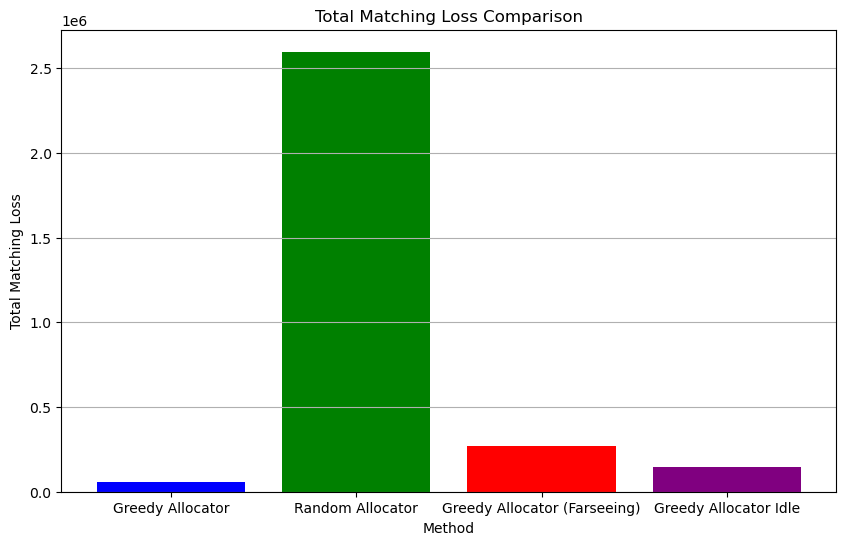

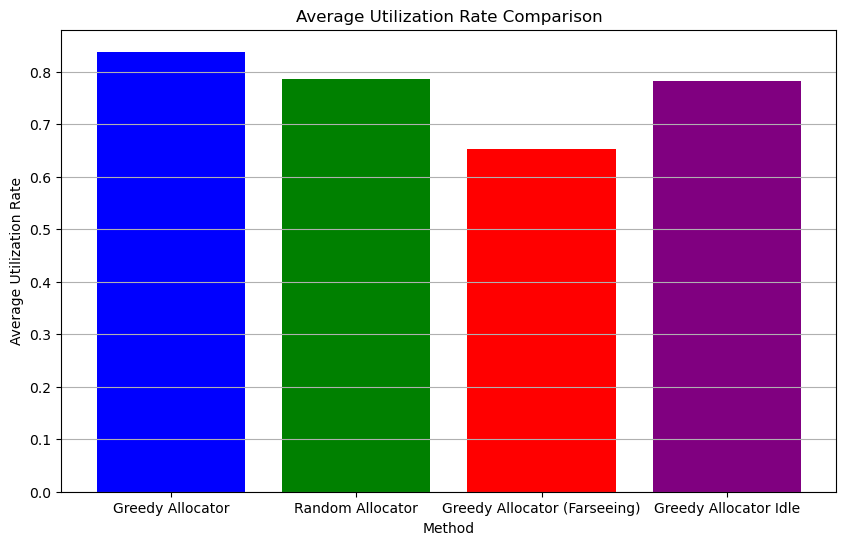

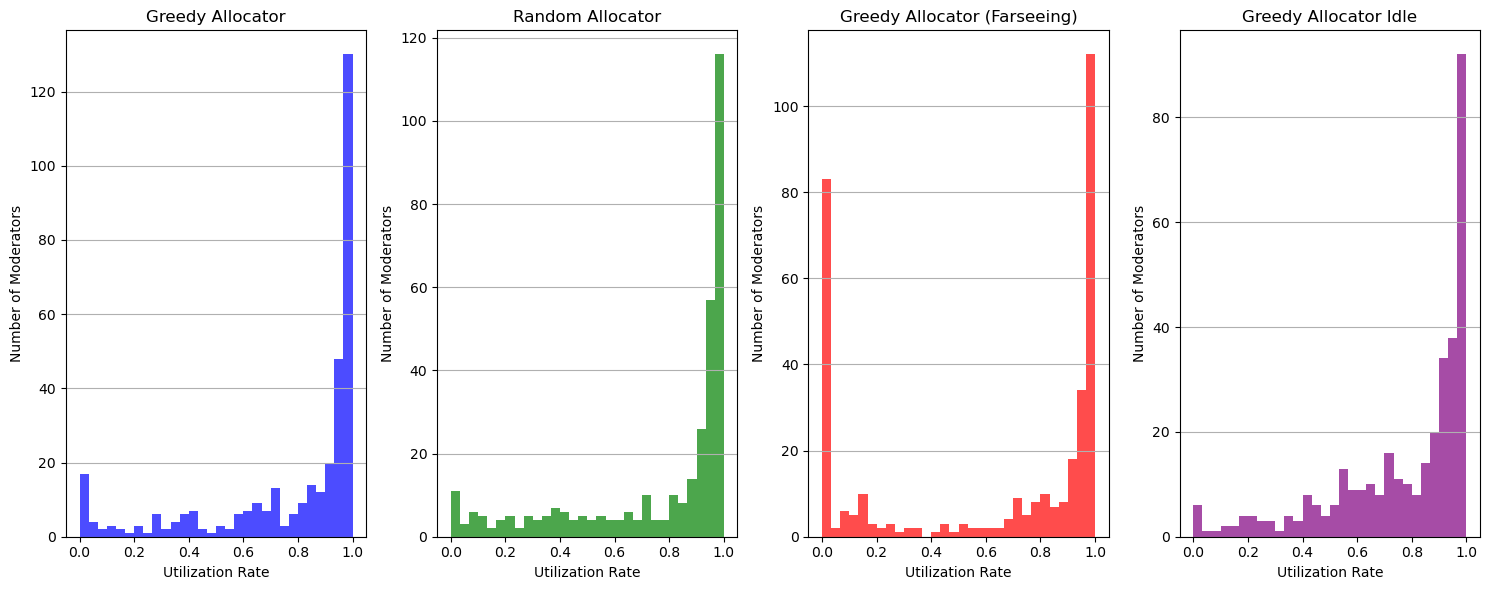

In [32]:
import json
import matplotlib.pyplot as plt

# Load the data from the JSON files
def load_data(filepath):
    with open(filepath, "r") as file:
        return json.load(file)

# Define comparisons
comparisons = [
    {"name": "Greedy Allocator", "data": load_data('./simulation_results/result_even_1_1_raw_greedy.json')},
    {"name": "Random Allocator", "data": load_data('./simulation_results/result_even_1_1_raw_random.json')},
    {"name": "Greedy Allocator (Farseeing)", "data": load_data('./simulation_results/result_even_1_1_raw_greedy_farseeing.json')},
    {"name": "Greedy Allocator Idle", "data": load_data('./simulation_results/result_even_1_1_raw_greedy_idle.json')},
    # Add more comparisons as needed
]

def plot_matching_loss():
    plt.figure(figsize=(10, 6))
    methods = [comp["name"] for comp in comparisons]
    losses = [comp["data"][0] for comp in comparisons]
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Add more colors if needed
    plt.bar(methods, losses, color=colors)
    plt.title('Total Matching Loss Comparison')
    plt.ylabel('Total Matching Loss')
    plt.xlabel('Method')
    plt.grid(axis='y')
    plt.show()

plot_matching_loss()

# Plotting the average utilization rate for all methods
def plot_avg_utilization():
    plt.figure(figsize=(10, 6))
    methods = [comp["name"] for comp in comparisons]
    avg_utilizations = [comp["data"][1] for comp in comparisons]
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Add more colors if needed
    plt.bar(methods, avg_utilizations, color=colors)
    plt.title('Average Utilization Rate Comparison')
    plt.ylabel('Average Utilization Rate')
    plt.xlabel('Method')
    plt.grid(axis='y')
    plt.show()

plot_avg_utilization()


# Plotting histograms of the utilization rates for all moderators for all methods
def plot_moderators_utilization():
    plt.figure(figsize=(15, 6))
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Add more colors if needed
    for i, comp in enumerate(comparisons):
        plt.subplot(1, len(comparisons), i+1)
        plt.hist(comp["data"][3], bins=30, color=colors[i], alpha=0.7)
        plt.title(f'{comp["name"]}')
        plt.xlabel('Utilization Rate')
        plt.ylabel('Number of Moderators')
        plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_moderators_utilization()


We can see that greedy-farseeing is (supposed to be) the best! (There is potentially some bugs right now which affect the performance of greedy-farseeing).
### Let's then see how greedy-farseeing perform for different distribuion of data.

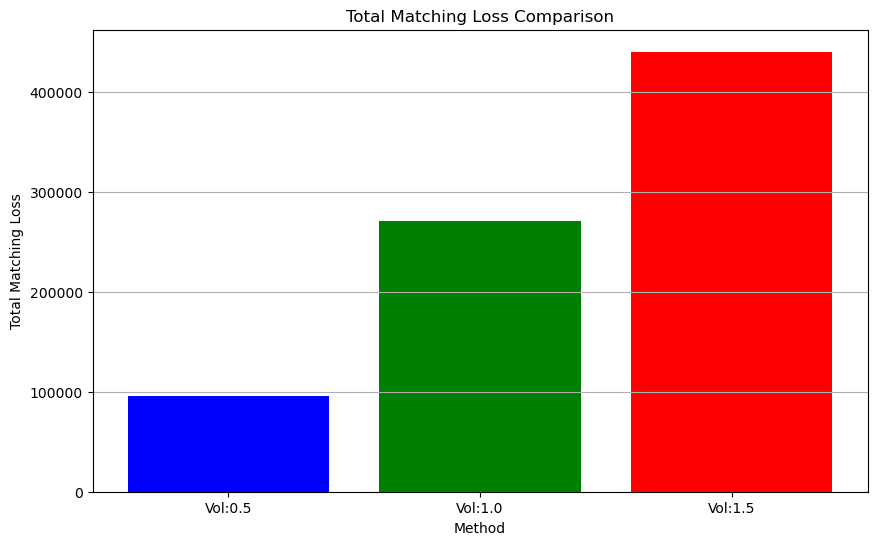

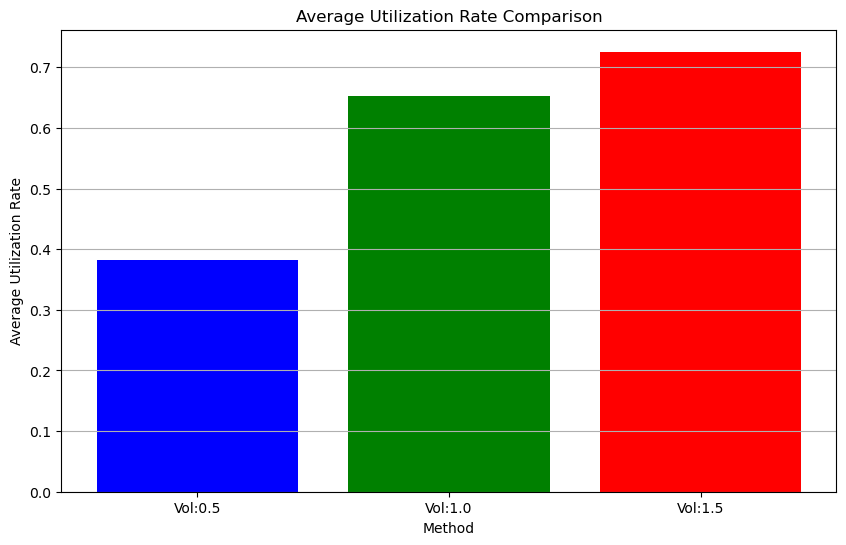

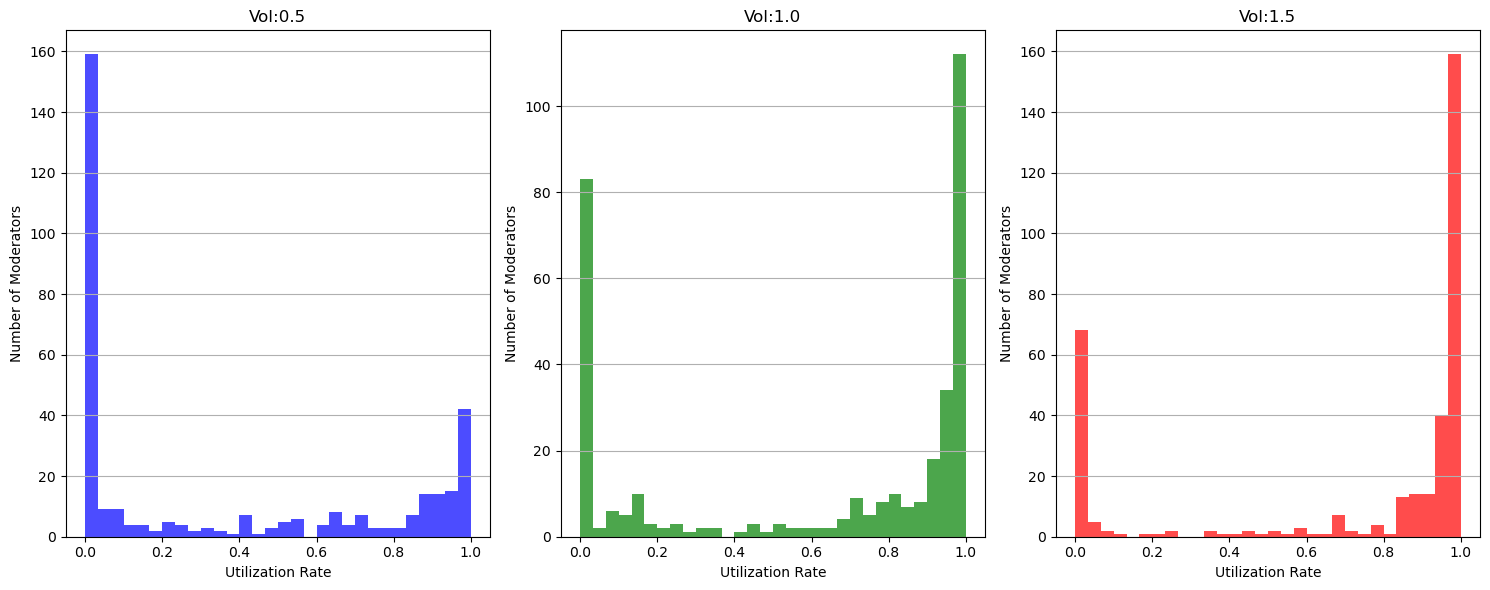

In [31]:
# Load the data from the JSON files
def load_data(filepath):
    with open(filepath, "r") as file:
        return json.load(file)

# Define comparisons
comparisons = [
    {"name": "Vol:0.5", "data": load_data('./simulation_results/result_even_0.5_1_raw_greedy_farseeing.json')},
    {"name": "Vol:1.0", "data": load_data('./simulation_results/result_even_1_1_raw_greedy_farseeing.json')},
    {"name": "Vol:1.5", "data": load_data('./simulation_results/result_even_1.5_1_raw_greedy_farseeing.json')},
    # Add more comparisons as needed
]

# Plotting the total matching loss for all methods
def plot_matching_loss():
    plt.figure(figsize=(10, 6))
    methods = [comp["name"] for comp in comparisons]
    losses = [comp["data"][0] for comp in comparisons]
    plt.bar(methods, losses, color=['blue', 'green'])
    plt.title('Total Matching Loss Comparison')
    plt.ylabel('Total Matching Loss')
    plt.xlabel('Method')
    plt.grid(axis='y')
    plt.show()

def plot_matching_loss():
    plt.figure(figsize=(10, 6))
    methods = [comp["name"] for comp in comparisons]
    losses = [comp["data"][0] for comp in comparisons]
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Add more colors if needed
    plt.bar(methods, losses, color=colors)
    plt.title('Total Matching Loss Comparison')
    plt.ylabel('Total Matching Loss')
    plt.xlabel('Method')
    plt.grid(axis='y')
    plt.show()

plot_matching_loss()

# Plotting the average utilization rate for all methods
def plot_avg_utilization():
    plt.figure(figsize=(10, 6))
    methods = [comp["name"] for comp in comparisons]
    avg_utilizations = [comp["data"][1] for comp in comparisons]
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Add more colors if needed
    plt.bar(methods, avg_utilizations, color=colors)
    plt.title('Average Utilization Rate Comparison')
    plt.ylabel('Average Utilization Rate')
    plt.xlabel('Method')
    plt.grid(axis='y')
    plt.show()

plot_avg_utilization()


# Plotting histograms of the utilization rates for all moderators for all methods
def plot_moderators_utilization():
    plt.figure(figsize=(15, 6))
    colors = ['blue', 'green', 'red', 'purple', 'yellow']  # Add more colors if needed
    for i, comp in enumerate(comparisons):
        plt.subplot(1, len(comparisons), i+1)
        plt.hist(comp["data"][3], bins=30, color=colors[i], alpha=0.7)
        plt.title(f'{comp["name"]}')
        plt.xlabel('Utilization Rate')
        plt.ylabel('Number of Moderators')
        plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_moderators_utilization()

It is clear to see that the utilization rate and loss both increase if we add the volume of ads. We need to strike a balance!